In [0]:
%matplotlib inline
from fastai.basics import *

#  Линейная регрессия

Хотим аппроксимировать набор точек прямой линией

Создадим случайный точки

In [0]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,1].uniform_(-1.,1)
x[:5]

tensor([[ 1.0000,  0.7640],
        [ 1.0000, -0.2795],
        [ 1.0000, -0.8252],
        [ 1.0000,  0.2123],
        [ 1.0000,  0.8490]])

In [4]:
w_true = tensor(3.,2); w_true

tensor([3., 2.])

In [0]:
y = x@w_true + torch.rand(n)

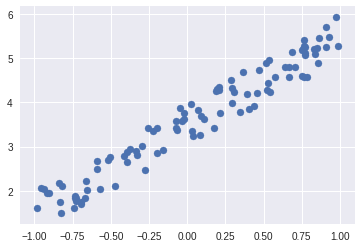

In [6]:
plt.scatter(x[:,1], y);

Хотим найти **параметры** (веса) `w` такие, чтобы минимизировать *ошибку* между реальными значениями *y_hat* и предсказаниями *y = x@w*. В качестве функции ошибок используем **среднеквадратическое отклонение**

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
w = tensor(5.,-1.)

In [9]:
y_hat = x@w
mse(y_hat, y)

tensor(4.8429)

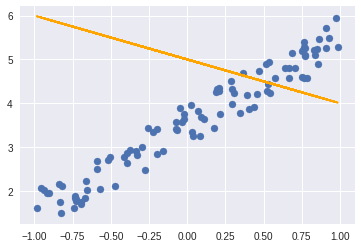

In [10]:
plt.scatter(x[:,1],y)
plt.plot(x[:,1],y_hat, color='orange');

# Градиентный спуск

In [0]:
def update(w):
  with torch.no_grad():
    y_hat = x@w
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    grad_w = (x@w - y)@x
    w-=lr*grad_w

In [12]:
w = tensor(5.,-1)
lr = 2e-3
for t in range(100): 
  update(w)

tensor(4.8429)
tensor(0.9109)
tensor(0.2793)
tensor(0.1300)
tensor(0.0939)
tensor(0.0851)
tensor(0.0830)
tensor(0.0825)
tensor(0.0824)
tensor(0.0823)


In [13]:
w

tensor([3.5249, 2.0018])

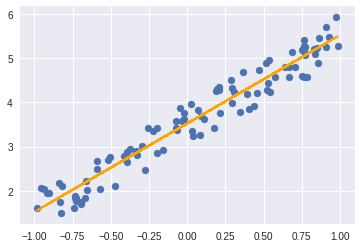

In [14]:
plt.scatter(x[:,1],y)
plt.plot(x[:,1],x@w, c='orange');

## Анимация

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [16]:
w = tensor(5.,-1)
lr = 2e-3
fig = plt.figure()
plt.scatter(x[:,1], y, c='orange')
line, = plt.plot(x[:,1], x@w)
plt.close()

def animate(i):
    update(w)
    line.set_ydata(x@w)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

#Домашнее задание - реализовать стохастический градиентный спуск

Идея очень простая - на каждом шаге считаем градиент не по всем точкам, а по случайно выборке из них. Напишите код и посмотрите, как влияет на обучение размер выборки, соотношение шага и размера выборки. Выборку делать без возвращения, когда примеры закончатся - начать заново.

# Домашнее задание 2 - нейросеть

Напишите нейросеть с одним скрытым слоем, которая будет аппроксимировать нелинейную функцию

In [55]:
N = 100
n_input = 1
n_hidden = 50
n_output = 1

x = torch.ones(N,n_input+1) 
x[:,1].uniform_(-1.,1)
y = (x[:,1]**3 + x[:,1]**2 -x[:,1] + 1 + torch.ones(N).uniform_(-1,1)*0.2).unsqueeze(1)

W1 = torch.ones(n_input+1, n_hidden).uniform_(-1.,1)
W2 = torch.ones(n_hidden, n_output).uniform_(-1.,1)
lr = 1e-3

torch.Size([100, 1])


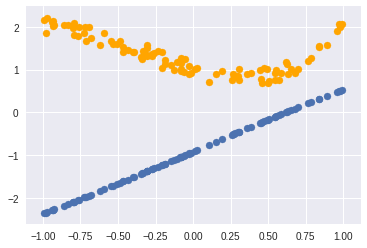

In [56]:
h = 1/(1+torch.exp(-x@W1))
y_pred = (h@W2)
plt.scatter(x[:,1],y_pred)
plt.scatter(x[:,1],y,color='orange')

In [0]:
def update_NN(W1, W2):
  with torch.no_grad():

    #ваш код здесь
    

    W1-=lr*grad_W1
    W2-=lr*grad_W2

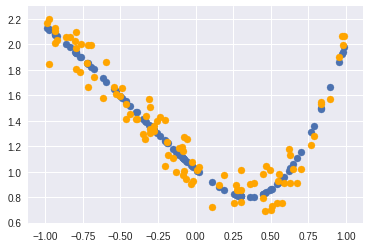

In [58]:
plt.scatter(x[:,1],y_pred)
plt.scatter(x[:,1],y,color='orange')